### ASTROINFORMATICS

https://github.com/astromundus/ns_dec2018/



# Introduction to Bayesian Inference




##### Resources for this notebook include:

- [Textbook](chap5.pdf) Chapter 5.  
- [Jake VanderPlas's workshop "Bayesian Astronomy"](https://github.com/jakevdp/BayesianAstronomy)
- [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction"](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)


##### Highly recommended supplemental background reading:

- [Mario Juric: Frequentist vs. Bayesian Perspectives (LSSTC Data Science Fellowship Program Lecture)](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/tree/master/Session4/Day1)
- [Jake VanderPlas: ``Frequentism and Bayesianism: A Python-driven Primer"](https://arxiv.org/abs/1411.5018)
- [Hogg, Bovy and Lang: ``Data analysis recipes: Fitting a model to data"](https://arxiv.org/abs/1008.4686)


##### For those who want to dive deep:

- [D. Sivia and J. Skilling: ``Data Analysis: A Bayesian Tutorial''](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320)
- [E.T. Jaynes: ``Probability Theory: The Logic of Science''](http://bayes.wustl.edu/etj/prob/book.pdf)
- [E.T. Jaynes: ``Confidence Intervals vs. Bayesian intervals''](http://bayes.wustl.edu/etj/articles/confidence.pdf)

##### Topics for this lecture

- Bayes Rule extended to Bayesian Inference
- The role of priors in Bayesian Inference 
- Bayesian credible regions
- Simple parameter estimation examples
- Simple parameter estimation examples
- Bayesian model selection 
- Bayesian Blocks algorithm for optimal histograms 


![BayesSlide1](figures/bayes1.jpg)

## Recall Bayes' Rule

We had that 
$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

Btw, we also used notation ($p$ that both $A$ and $B$ will happen) 

$$p(A \cap B) \equiv p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

We can define the **marginal probability** as
$$p(x) = \int p(x,y)dy,$$
where marginal means essentially projecting on to one axis.

We can re-write this as
$$p(x) = \int p(x|y)p(y) dy$$


Since $$p(x|y)p(y) = p(y|x)p(x)$$ we can write that
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$
which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial -- it is just probability algebra!

What's more controversial is the **definition of probability**.

## Frequentist Probability
For frequentists, probability only has meaning in terms of **a limiting case of repeated measurements**.

That is, if I measure the photon flux $F$ from a given star (we'll assume for now that the star's flux does not vary with time), then measure it again, then again, and so on, each time I will get a slightly different answer due to the statistical error of my measuring device. In the limit of a large number of measurements, the frequency of any given value indicates the probability of measuring that value.

For frequentists **probabilities are fundamentally related to frequencies of events**. This means, for example, that **in a strict frequentist view, it is meaningless to talk about the probability of the true flux of the star: the true flux is (by definition) a single fixed value, and to talk about a frequency distribution for a fixed value is nonsense.**

## Bayesian Probability
For Bayesians, the concept of probability is extended to cover **degrees of certainty about statements**. You can think of it as an **extension of logic** to statements where there's uncertainty.

Say a Bayesian claims to measure the flux $F$ of a star with some probability $P(F)$: that probability can certainly be estimated from frequencies in the limit of a large number of repeated experiments, but this is not fundamental. The probability is a statement of my knowledge of what the measurement reasult will be.

For Bayesians, **probabilities are fundamentally related to our own knowledge about an event**. This means, for example, that **in a Bayesian view, we can meaningfully talk about the probability that the true flux of a star lies in a given range.**

That probability codifies our knowledge of the value based on prior information and/or available data.

## Why is this important?

Because it frees the Bayesian to ask a question such as:

* Given all I know (my measurements, the literature), what is the probability that a parameter $\theta$ is so-and-so?
* Given all I know (my measurements, the literature), what is the probability that a model is true?

And this is, intuitively, what a scientist wants to know.


![BayesSlide1](figures/bayes2.jpg)

### Recall Maximum Likelihood Estimation (MLE) applied to a Heteroscedastic Gaussian

For example, assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is 

$$L \equiv p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$



leading to (more convenient) log-likelihood

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_0} = \sum_{i=1}^N \frac{(x_i - \mu_o)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu_o}{\sigma_i^2},$$

yields a MLE solution of 
$$\mu_0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty (from the second derivative)
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)

In [2]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L
# first generate a sample of N points drawn from N(mu,sigma):
sampleSize=3
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(sampleSize) 
print(sample)

[ 1.09934283  0.97234714  1.12953771]


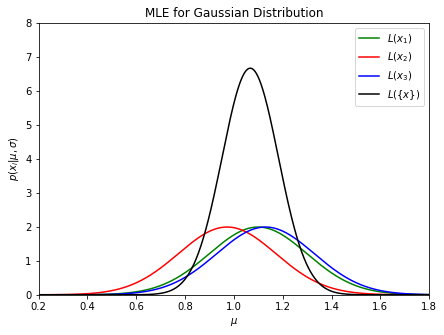

In [3]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L
# now compute likelihoods for each point using true mu 
muGrid = np.linspace(0,2,1000)
L1 = norm(sample[0], sigma).pdf(muGrid) 
L2 = norm(sample[1], sigma).pdf(muGrid) 
L3 = norm(sample[2], sigma).pdf(muGrid) 
L = L1 * L2 * L3
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

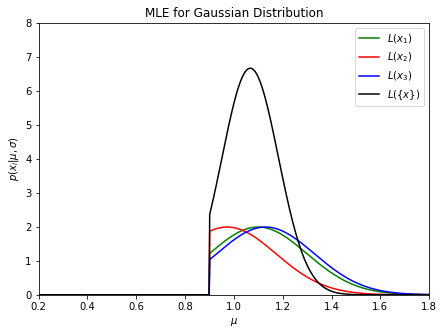

In [4]:
### What if I told you that mu>0.9?
muMin = 0.9
L1[muGrid < muMin] = 0
L2[muGrid < muMin] = 0
L3[muGrid < muMin] = 0
L = L1 * L2 * L3
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()
plt.show() 

### Brief History 

The Reverend Thomas Bayes (1702–1761) was a British amateur mathematician who wrote a manuscript 
on how to combine an initial belief with new data to arrive at an improved belief. The manuscript 
was published posthumously in 1763 and gave rise to the name Bayesian statistics.  

The initial "belief" can be (and often is) based on data. For example, consider only the first (N-1)
measurements, instead of all N measurements as in 
$$\mu_0^{N} = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$
which gives 
$$\mu_0^{N-1} = \frac{\sum_i^{N-1} (x_i/\sigma_i^2)}{\sum_i^{N-1} (1/\sigma_i^2)}.$$

Now, we can rewrite the expression for $\mu_0^{N}$ using the value of $\mu_0^{N-1}$, which 
we take to be our "intial belief", and the N-th measurement, $x_N$: 

$$\mu_0^{N} = \frac{(x_N/\sigma_N^2) + \sum_i^{N-1} (x_i/\sigma_i^2)}{\sum_i^{N-1} (1/\sigma_i^2)}
     * \frac{\sum_i^{N-1} (1/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}  $$
     
$$\mu_0^{N} = \frac{(x_N/\sigma_N^2)}{\sum_i^{N} (1/\sigma_i^2)} + \mu_0^{N-1} 
     * \frac{\sum_i^{N-1} (1/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}  $$

**This expression is a recipe for combining the prior belief, or knowledge ($\mu_0^{N-1}$), 
with the new measurement $x_N$. **

Given the inverse variance (squared uncertainty) $\sigma_\mu^{-2} = \sum_i^{N-1} (1/\sigma_i^2)$,
we also have 
$$\mu_0^{N} = \frac{(x_N/\sigma_N^2) + (\mu_0^{N-1}/\sigma_\mu^2)}{1/\sigma_N^2 + 1/\sigma_\mu^2}  $$

** The impact of each measurement is weighted by its inverse uncertainty squared. ** 

**A side note** This is an example of a conjugate prior. In special combinations 
of priors and likelihood functions, the posterior probability has the same functional 
form as the prior probability. These priors are called conjugate priors and represent 
a convenient way for generalizing computations. Here both prior and posterior pdfs
have the same functional form (Gaussian) because Gaussian prior and Gaussian likelihood
are conjugate prior (this is related to the fact that convolution of two Gaussians
gives a Gaussian).
 
The above expression greatly simplifies in case of homoscedastic errors 
($\sigma_\mu^{-2} = (N-1)/\sigma^2$): 

$$\mu_0^{N} = x_N * \frac{1}{N} + \mu_0^{N-1} * \frac{N-1}{N},  $$

which is a simple weighted sum of the prior value $\mu_0^{N-1}$ and the new value $x_N$. 


**Bayesian methodology allows us to derive analogous expressions in more complex and more general cases.**
  
 

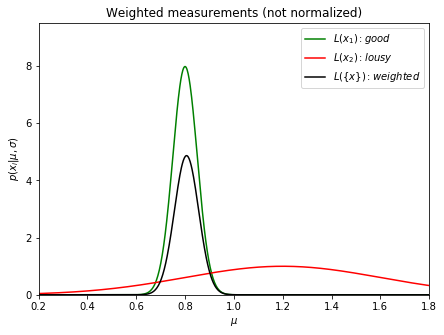

In [5]:
### What happens when we have one precise and one lousy measurement? 
L1 = norm(0.8, 0.05).pdf(muGrid) 
L2 = norm(1.2, 0.4).pdf(muGrid) 
L = L1 * L2 
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1): good$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2): lousy$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\}): weighted$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 9.5)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('Weighted measurements (not normalized)')
plt.legend()
plt.show() 
 

**If either of the two likelihoods (or one of the likelihood and prior pair) is 
the Dirac's $\delta$ function ("zero width"), the posterior is the same delta function.**
 

### More brief History 

The first renowned mathematician to popularize Bayesian methodology was Pierre Simon Laplace, 
who rediscovered (1774) and greatly clarified Bayes' principle. Laplace applied the principle 
to a variety of contemporary problems in astronomy, physics, population statistics, and even 
jurisprudence. One of the most famous results is his estimate of the mass of Saturn and its 
uncertainty, which remain consistent with the best measurements of today. 

**Laplace said: "I find that it is a bet of 11,000 against one that the error of this result is not 1/100th 
of its value".** Therefore, Laplace clearly interpreted measurements as giving a probability
statement about the mass of Saturn, although there is only one Saturn and its true mass is 
what it is, and it is not a random variable according to frequentist statistics.

Despite Laplace's fame, Bayesian analysis did not secure a permanent place in science.
Instead, classical frequentist statistics was adopted as the norm (this could be at least
in part due to the practical difficulties of performing full Bayesian calculations without the
aid of computers). Much of Laplace's Bayesian analysis was ignored until the early twentieth
century when Harold Jeffreys reinterpreted Laplace's work with much clarity. 
Yet, even Jeffreys' work was not fully comprehended until around 1960, when it took off thanks
to vocal proponents such as de Finetti, Savage, Wald, and Jaynes, and of course, the advent of
computing technology. 
 

### An example of a difficulty with the MLE 

Imagine you arrive at a bus stop, and observe that the bus arrives $t$ minutes later 
(it is assumed that you had no knowledge about the bus schedule). What is the mean time 
between two successive buses, $\tau$, if the buses keep a regular schedule? 

It is easy to derive an intuitive answer. The wait time is distributed uniformly in the interval $0 \le t \le \tau$, and on average you would wait for $t=\tau/2$ minutes.  Rearranging this gives $\tau = 2t$, which agrees with intuition.

What does the maximum likelihood approach give? 

The probability that you will wait $t$ 
minutes (the likelihood of data) is given by the uniform distribution (every $t$ is equally likely)
$$ p(t\,|\,\tau) =  1/\tau, $$
if $0 \le t \le \tau$ and $p(t|\tau)=0$ otherwise.


Because we only observe a single point, the data likelihood is simply equal to this probability. 
The maximum likelihood, then, corresponds to the smallest possible $\tau$ such that $t \le \tau$: 
this is satisfied by $\tau = t$ and not $\tau=2t$ as we expected!!

Computing the expectation value or the median for $\tau$ does not help either because
the resulting integrals diverge. These puzzling results are resolved by the use of appropriate prior
information, as will be discussed in a moment. We shall see several other examples later where the
addition of extra information changes the results we would get from the maximum likelihood
approach.

Let's first introduce basic steps in Bayesian analysis, then use it to resolve
the "bus MLE puzzle", and then we'll discsus nuisance parameters in more details. 
 

## Bayesian Statistical Inference

Up to now we have been computing the **likelihood** $p(D\,|\,M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall that Bayes' Rule is:
$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$
where $D$ is for data and $M$ is for model. Or in words, 
$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$
where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 
$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I),$$
it will still appear in the term $p(\theta\,|\,M,I)$.

Note that it is often the case that $p(D\,|\,I)$ is not evaluated explictly since the posterior probability 
can be (re)normalized. 

**The Bayesian Statistical Inference process** is then
* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* chose a prior$^1$, $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
* determine the posterior pdf, $p(M,\theta \,|\,D,I)$
* search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ 
* quantify the uncertainty of the model parameter estimates
 
$^1$: Note that $p(M,\theta\,|\,I) = p(\theta\,|\,M, I)\, p(M\,|\,I)$.  

Going back to our bus arrival problem, our unknown model parameter is $\tau$ and data is $t$, so that 
$$p(\tau\,|\,t,I) = p(t\,|\,\tau) \, p(\tau\,|\,I).$$

Before applying this expression, we need to discuss how to choose priors, here $p(\tau\,|\,I)$.

### Bayesian priors

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

Detailed discussion can be found in Section 5.2 in the textbook. There are three
main principles used to choose a prior: 


#### The Principle of Indifference

Essentially this means adopting a uniform prior, though you have to be a bit careful.  Saying that an asteroid is equally likely to hit anywhere on the Earth is not the same as saying that all latitudes of impact are equally likely.  

Assuming $1/6$ for a six-side die, or 1/2 for heads and tails of a fair coin, would be an example of indifference.

#### The Principle of Invariance (or Consistency)

This applies to location and scale invariance.  

**Location invariance** suggests a uniform prior, within the accepted bounds: $p(\theta|I) \propto 1/(\theta_{max}-\theta_{min})$ for $\theta_{min} \le \theta \le \theta_{max}$. 

**Scale invariance** gives us priors that look like $p(\theta|I) \propto 1/\theta$, which implies a uniform
prior for ln($\theta$). 

#### The Principle of Maximum Entropy

We will not discuss it here - for more details, see Section 5.2.2 in the textbook.
 
It is often true that Bayesian analysis and traditional MLE are essentially equivalent.  
However, in some cases, considering the priors can have significant consequences, as
we will see later. 

We will skip examples of very steep priors and their consequences called in astronomy
literature **Eddington-Malmquist** and **Lutz-Kelker** biases (see Chapter 5 in the textbook
if you are interested). 

Now, let's go back to the bus arrival problem. 

In our **bus arrival problem**, $\tau$ is unknown model parameter and data (datum) is $t$. The
posterior pdf for $\tau$ is (we ignore normalization): 
$$p(\tau\,|\,t, I) \propto p(t\,|\,\tau,I) \, p(\tau\,|\,I).$$

The likelihood of data is given by the uniform distribution (every $t$ is equally likely, with 
$0 \le t \le \tau$):
$$ p(t\,|\,\tau,I) =  1/\tau. $$  

Following the Principle of Invariance, we assign the prior
$$ p(\tau\,|\,I) = 1/ \tau.$$

Note: the two pdfs look the same but this is essentially a coincidence. 

So, we have 
    $$p(\tau \,|\, t,I) \propto  1/ \tau^2,$$
for $\tau > t$ and 0 otherwise. We use normalization constraint 
$$ \int_t^\infty p(\tau\,|\,I)d\tau = \int_t^\infty C/\tau^2 d\tau \equiv 1,$$
to get $C=t$ (the divergent integral over $\tau$ encountered in the maximum likelihood 
analysis is mitigated here by the extra $\tau$ term from the prior).

The properly normalized posterior pdf for $\tau$ (valid for $\tau > t$) is thus 
$$   p(\tau \,|\, t,I) = \frac{t}{\tau^2}.$$
  
  
The median $\tau$ given by the posterior $p(\tau \,|\, t,I)$ is now equal to $2t$, 
in agreement with our expectations. 

An interesting side result is that the p% quantiles 
are equal to ($1-t/\tau$); for example, the 95% confidence region for $\tau$, 
or **the credible region**, spans $1.03 t < \tau < 40 t$. If we waited for a bus 
for just 1 minute, then, adopting the usual 95% confidence region, we cannot reject the 
possibility that $\tau$ is as large as 40 minutes. 

Equivalently, if we waited for a 
bus for 1 minute, we can paraphrase Laplace and say that “it is a bet of 20 against 1 
that the bus will arrive in the interval between 0.03 minutes and 39 minutes from now.”





### Estimating multiple parameters: heteroscedastic Gaussian as an example


Consider the case of measuring a rod as above.  We want to know the posterior pdf for the length of the rod, $p(M,\theta|D,I) \equiv p(\mu|\{x_i\},\{\sigma_i\},I)$.

For the likelihood we have
$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

**In the Bayesian case, we also need a prior.**  We'll adopt a uniform distribution given by
$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$
where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then
$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is exactly the same as we saw before, except that the value of the constant is different.  Since the constant doesn't come into play, we get the same result as before:
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$
with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$
 
 We get the same result because we used a flat prior. If the case were homoscedastic instead of heteroscedastic, we obviously would get the result from our first example.


### Estimating multiple parameters: heteroscedastic Gaussian as an example


Now let's consider the case where **$\sigma$ is not known**, but rather it needs to be determined from the data, too.

In this case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather $p(\mu,\sigma|\{x_i\},I)$.

As before we have
$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
except that now $\sigma$ is uknown.

Our Bayesian prior is now 2D instead of 1D and we'll adopt 
$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have
$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$
where
$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

This expression has $x_i$ in it, which isn't that helpful, but since we are assuming a Gaussian distribution, we can take advantage of the fact that the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterized the distribution.  So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details (see textbook $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$. A side note: these three data-based values 
fully encapsulate our dataset and are called *sufficient statistics*.

Load and execute the next cell to visualize the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$.  Remember to change `usetex=True` to `usetex=False` if you have trouble with the plotting.  Try changing the values of $(N,\overline{x},V)$. 
 

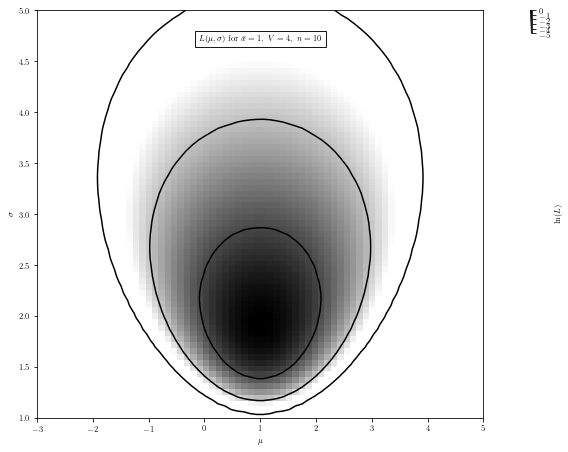

In [6]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()



### Nuisance parameters and marginalization: heteroscedastic Gaussian as an example
 
The plot from the previous cell is described by 
$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$
 
 
**A side note:** Had we assumed a uniform distribution of $\sigma$, instead of ln($\sigma$), then the factor multiplying ln($\sigma$) would change from (N + 1) to N. This is related to the fact that the expression for
the standard deviation has a term (N-1) rather than N, but we will leave detailed discussion for graduate school (or perhaps for the retirement home). 

Assume a case where $\sigma$ is not crucially important to what we are after, e.g. it may 
simply represent how good our measuring apparatus is - what we might get a Nobel prize for 
is $\mu$. Therefore, what we want is $p(\mu|\{x_i\},I)$, rather than $p(\mu,\sigma|\{x_i\},I)$.
We can get the former from the latter by the **marginalization over $\sigma$**, which means
integration of $p(\mu,\sigma|\{x_i\},I)$ over $\sigma$: 

$$ p(\mu\,|\,\{x_i\},I) = \int_0^\infty p(\mu,\sigma|\{x_i\},I) d\sigma$$
and thus (using the substitution $t$ = 1/$\sigma$ and integration by parts)

$$ p(\mu\,|\,\{x_i\},I) \propto \left(1 + \frac{(\overline{x}-\mu)^2}{V} \right)^{-N/2}. $$

It is easy to show that this result corresponds to Student’s t distribution (google it!) with 
k = N-1 degrees of freedom for the variable $t = (x-\mu)/(s/\sqrt{N})$, where $s$ is the sample 
standard deviation. Student’s t distribution is symmetric and bell shaped, but with heavier 
tails than for a Gaussian distribution.  

**Hold on!** This is not a Gaussian distribution promised by the Central Limit Theorem!!! 

That's fine! The CLT promised a Gaussian only for large N. Indeed, the above expression
(Student's t distribution) morphs into a Gaussian for large N - let's check!


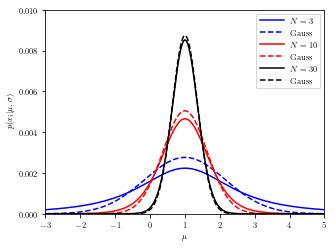

In [7]:
### let's see how Student's t distribution morphs into Gaussian distribution
# let's first choose mean x and variance as in the previous example
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

# and now let's generate p(mu) for N=3, 10 and 20
def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
#
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)
N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)
N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)
 
## plot
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(mu, pmu1, ls='-', c='blue', label=r'$N=3$')
plt.plot(mu, G1norm, ls='--', c='blue', label=r'Gauss')
plt.plot(mu, pmu2, ls='-', c='red', label=r'$N=10$')
plt.plot(mu, G2norm, ls='--', c='red', label=r'Gauss')
plt.plot(mu, pmu3, ls='-', c='black', label=r'$N=30$')
plt.plot(mu, G3norm, ls='--', c='black', label=r'Gauss')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show() 

The top panels of the figure below (textbook figure 5.5, for the code see 
[astroML website](http://www.astroml.org/book_figures/chapter5/fig_posterior_gaussian.html)) show marginal distributions $p(\mu)$ and $p(\sigma)$.  The solid line is 
analytic Bayesian result with uninformative prior and the dotted line is the result for a uniform prior (note 
that there is not that much difference).  The dashed line is the MLE result, which is quite different.  The bottom panels show the cumulative distributions.

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_posterior_gaussian_1.png)
 

The main result here is that **for smallish N ($<$10 or so), $p(\mu)$ is not Gaussian!** 

The code above can be used to compute $p(\mu)$ for arbitrary values of N, $\overline{x}$ and V.

For large N, Gaussian is a good approximation of $p(\mu)$. 




# Model Selection in Bayesian Framework



![BayesSlide1](figures/bayes2.jpg)

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
from astroML.plotting import hist
np.random.seed(42)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

## Bayesian Statistical Inference

In Bayesian inference, we evaluate the **posterior probability** by using
** data likelihood** and **prior** information: 
 
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

The prior can be expanded as 
$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I).$$
 
It is often the case that $p(D\,|\,I)$ is not evaluated explictly since the posterior probability 
can be (re)normalized. 

**The Bayesian Statistical Inference process** is then
* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* chose a prior $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
* determine the posterior pdf, $p(M,\theta \,|\,D,I)$
* search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ 
* quantify the uncertainty of the model parameter estimates (credible region)
 
  

 
 
 

## (Properly) Fitting a Straight Line

Let's now take a look at another example where adequate priors are important and influence the final result: the fitting of a straight line to (x,y) data. An excellent discussion of this case can be found in a 
[blog by Jake VanderPlas](http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/). A great reference in that blog is a paper by Jaynes: "Straight Line Fitting: A Bayesian Solution"

## Maximum Likelihood Approach

In Week 3, we covered MLE approach to fitting a straight line - let's recall what we did.

Assume the scatter in our measurements (the residuals) is generated by a gaussian process. I.e.:

$$ y_i = a x_i + b + r_i $$

where $r_i$ is drawn from $N(0, \sigma)$. Here, $\sigma$ is the known homoscedastic measurement 
uncertainty for $y$ (and we assume that the uncertainty for x is negligible). 

Assuming the measurements are independent, the likelihood is the product of individual probabilities 
for every $y_i$:

$$ L(a, b) = \prod_{i=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(y_i - a x_i - b)^2}{2 \sigma^2} \right) $$

and $\ln L$ is equal to:

$$ \ln L(a, b) = constant - \frac{1}{2 \sigma^2} \sum_{i=1}^N (y_i - a x_i - b)^2.$$

This is the expression that the MLE minimizes with respect to $a$ and $b$ to find ML estimators for those parameters. 

## Bayesian Approach

In Bayesian approach we have for the posterior probability

$$ p(a, b \,|\, \{x_i,y_i\}) \propto L(a, b) \, p(a) \, p(b), $$

where $p(a)$ and $p(b)$ are priors for $a$ and $b$. Obviously, if we adopt uniform priors
the MLE values of $a$ and $b$ maximize the posterior probability, too.

** However, the uniform prior for $a$ is not an uninformative prior! **   Let's illustrate this point.

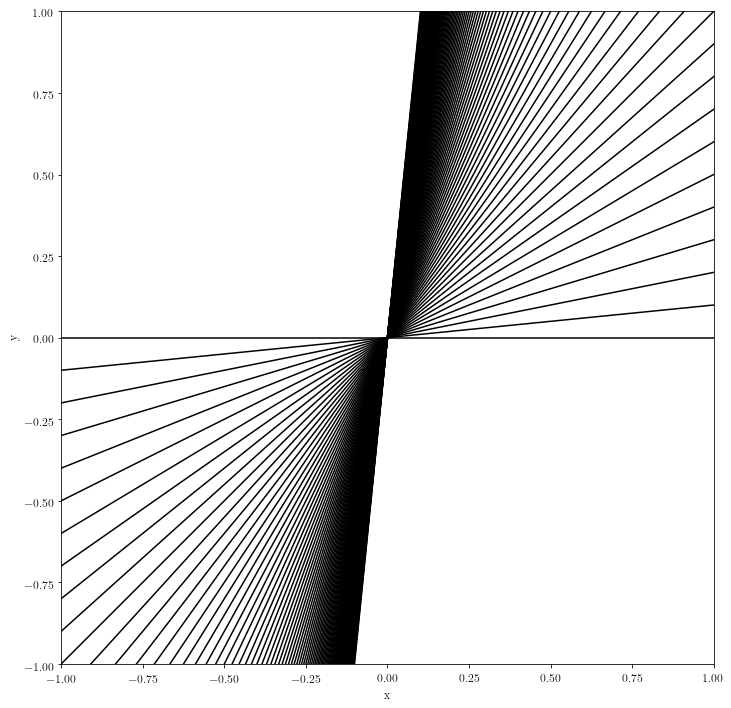

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'), figsize=(12, 12))
x = np.linspace(-1, 1)

for slope in np.arange(0, 10, 0.1):
    plt.plot(x, slope * x, '-k')

ax.axis([-1, 1, -1, 1], aspect='equal');
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

These lines have evenly-spaced slopes in units of 0.1, yet the higher slopes 
are bunched together. Due to this bunching, a flat prior on slope will highly 
favor very steep slopes! A flat prior on slope is not a minimally informative 
prior, and may end up biasing your result for small datasets (with enough data 
the effect vanishes).

An uninformative prior for the slope can be derived by requiring symmetry 
(the same answers) between fitting y vs. x and x vs. y. The result is that

$$   p(a) \propto \frac{1}{(1 + a^2)^{3/2}}. $$

Note that $a$ is the tangent of the angle with the $x$ axis, $\theta$, $a=tan(\theta)$,
and $p(a)$ is
defined for $-\infty < a < \infty$.

We will solve this problem with uninformative and flat priors for $a$ next
week (after we introduce Markov Chain Monte Carlo method and tools). 

And one final simple Bayesian example: the coin flip. 
 

### Parameter estimation for the binomial distribution (or, the danger of approximation)

If you flip a coin $N$ times and get $k$ tails, the probability of tails, $b$,
can be estimated as $b_o=k/N$. 
For large N, the uncertainty of $b_o$ is approximately Gaussian and given by 
$$ \sigma_b = \left[\frac{b_o \, (1-b_o)}{N}\right]^{1/2}. $$

For small N, we can use Bayesian approach to compute posterior pdf $p(b)$, as follows.

Here the data set $\{x_i\}$ is discrete: all outcomes are either 0 (heads) or 1 (tails, which we will consider “success”). An astronomical analog might be the computation of the fraction of galaxies which show evidence for a black hole in their center. 

Given a model parametrized by the probability of success (i.e. tails) $b$, the likelihood that the data set 
contains k outcomes equal to 1 is given by 
  $$    p(k\,|\,b, N) = \frac{N!}{k! \, (N-k)!} \, b^k \, (1-b)^{N-k} $$

Assuming that the prior for $b$ is flat in the range 0-1, the posterior pdf for $b$ is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$

where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

For a concrete numerical example, let us assume that we studied $N = 10$ galaxies and found 
a black hole in $k = 4$ of them. Our best estimate for the fraction of galaxies with black 
holes is $b_o = k/N = 0.4$. An interesting question is, “What is the probability that, say, 
$b < 0.1$?”. For example, your colleague’s theory placed *an upper limit of 10%* for the fraction 
of galaxies with black holes and you want to test this theory using classical framework 
“Can it be rejected at a confidence level $\alpha = 0.01$?”.

In other words, if the probability of $b < 0.1$, given data, is smaller than 0.01 (that is,
the probability of $b > 0.1$ is larger than 0.99) we reject the theory (in classical statistical 
hypothesis testing), and if the probability of $b < 0.1$ is larger than 0.01 we cannot reject
the theory (which does not prove that the theory is correct!). We will address Bayesian
hypothesis testing further below. 

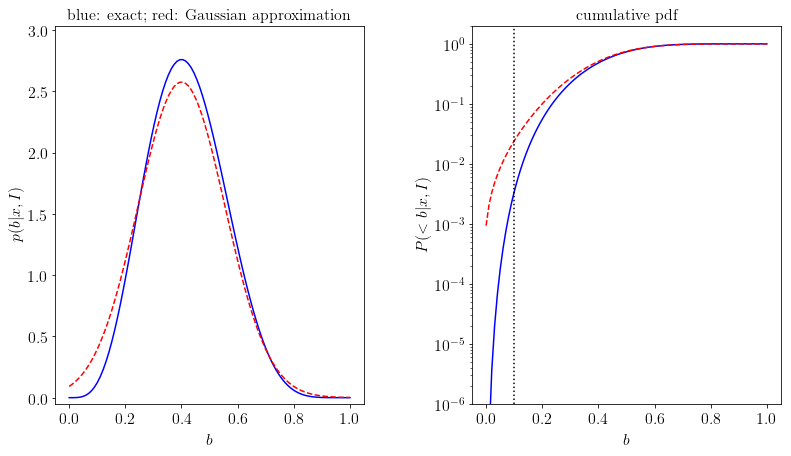

In [10]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm, binom
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

#------------------------------------------------------------
# Plot posterior as a function of b
n = 10  # number of points
k = 4  # number of successes from n draws

b = np.linspace(0, 1, 100)
db = b[1] - b[0]

# compute the probability p(b) (eqn. 5.70)
p_b = b ** k * (1 - b) ** (n - k)
p_b /= p_b.sum()
p_b /= db
cuml_p_b = p_b.cumsum()
cuml_p_b /= cuml_p_b[-1]

# compute the gaussian approximation (eqn. 5.71)
b0 = k * 1. / n
sigb = np.sqrt(b0*(1-b0)/n)
p_g = norm(b0, sigb).pdf(b)
cuml_p_g = p_g.cumsum()
cuml_p_g /= cuml_p_g[-1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 7.5))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)

ax = fig.add_subplot(121)
ax.plot(b, p_b, '-b')
ax.plot(b, p_g, '--r')

ax.set_ylim(-0.05, np.max(p_b)*1.1)

ax.set_xlabel('$b$')
ax.set_ylabel('$p(b|x,I)$')
plt.title('blue: exact; red: Gaussian approximation')


ax = fig.add_subplot(122, yscale='log')
ax.plot(b, cuml_p_b, '-b')
ax.plot(b, cuml_p_g, '--r')
ax.plot([0.1, 0.1], [1E-6, 2], ':k')
plt.title('cumulative pdf')


ax.set_xlabel('$b$')
ax.set_ylabel('$P(<b|x,I)$')
ax.set_ylim(1E-6, 2)

plt.show()

### Parameter estimation for the binomial distribution

For $N=10$ and $k=4$: $p(b < 0.1\,|\,k = 4, N = 10) = 0.003$ and the theory is rejected
at a confidence level $\alpha = 0.01$. 

However, using Gaussian approximation we get 
$p(b < 0.1) = 0.03$ and thus at a confidence level $\alpha = 0.01$ the theory is **not** rejected! 

**Conclusion**: when $N$ is not large, or $b_o$ is close to 0 or 1, one should avoid using the 
Gaussian approximation when estimating the credible region (or the confidence interval) for $b$.

An interesting numerical experiment is to observe how $p(b \,|\, k, N )$ evolves with the number
and outcome of coin flips - writing this code is part of HW4! For now, experiment with the above
code by changing $k$ and $N$ and observing the bahavior of $p(b)$, and its (dis)agreement with 
the Gaussian approximation. 

## Model Selection

We've fit a straight line to our data; but **what if we have a competing model?**

For example, how do we know that we should fit a straight line to our data and not, perhaps, 
a parabola, or y=sin(x), etc? 
  

In [11]:
## Let's use Jake's excellent example from
## http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, data, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, data, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

CHI2:
   best linear model: 11.3241283783
best quadratic model: 9.46283521857
    best cubic model: 8.99360837039
CHI2 per degree of freedom:
   best linear model: 0.629118243242
best quadratic model: 0.556637365798
    best cubic model: 0.562100523149


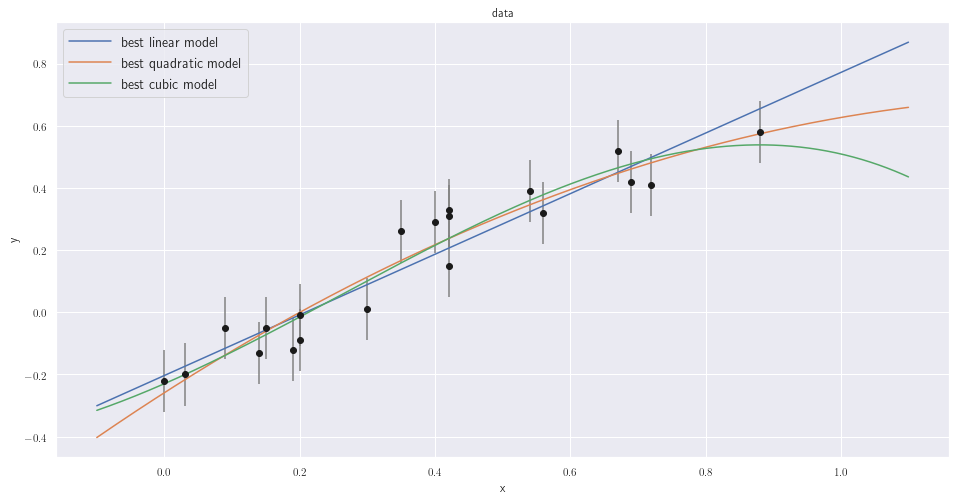

In [12]:
# generate (x,y, sigma_y) "data" 
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data
Ndata = x.size

# get best-fit parameters for linear, quadratic and cubic models
theta1 = best_theta(1, data=data)
theta2 = best_theta(2, data=data)
theta3 = best_theta(3, data=data)
# generate best fit lines on a fine grid 
xfit = np.linspace(-0.1, 1.1, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
# and compute chi2 per degree of freedom: sum{[(y-yfit)/sigma_y]^2} 
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
# the number of fitted parameters is 2, 3, 4
chi2dof1 = chi21/(Ndata - 2)
chi2dof2 = chi22/(Ndata - 3)
chi2dof3 = chi23/(Ndata - 4)

print("CHI2:")
print('   best linear model:', chi21)
print('best quadratic model:', chi22)
print('    best cubic model:', chi23)
print("CHI2 per degree of freedom:")
print('   best linear model:', chi2dof1)
print('best quadratic model:', chi2dof2)
print('    best cubic model:', chi2dof3)

# plot 
fig, ax = plt.subplots(figsize=(16, 8))
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');


$\chi^2$ per degree of freedom was computed as 
$$ \chi^2_{dof}  = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_{fit}}{\sigma_y} \right)^2, $$
where $N$ is the number of data points and $k$ is the number of free model parameters (2, 3, and 4).

For large values of $(N-k)$ (larger than about 10), the distribution of 
$\chi^2$ per degre of freedom is approximately Gaussian centered on $\mu=1$ and the width of
$\sigma=\sqrt{2/(N-k)}$  (here, $\sigma = 0.33, 0.34, 0.35$). 

The values of $\chi^2$ per degre of freedom for the three models are: 

   best linear model: 0.629 

best quadratic model: 0.557

best cubic model: 0.562 

 
**Which model should we adopt?**

Obviously, the cubic model has the lowest $\chi2$ ("fits the best"), but 
it has 4 free parameters while the linear model has only 2 free parameters.

**How do we trade improvement in $\chi^2$ with increasing model
complexity? **

**Occam’s razor:** select the simplest model that is in fair agreement with the data.

This principle was already known to Ptolemy who said: “We consider it a good principle 
to explain the phenomena by the simplest hypothesis possible.”


### Bayesian Model Comparison

Up to now we have concerned ourselves with determining the optimal parameters of a given model fit.  But what if *another* model would be a better fit (regardless of how you choose the parameters of the first model).  

That leads us to a discussion of model comparison (see textbook $\S$5.4 and $\S$5.7.1-3). To determine which model is better we compute the ratio of the posterior probabilities or the **odds ratio** for two models as
$$O_{21} \equiv \frac{p(M_2|D,I)}{p(M_1|D,I)}.$$

The posterior probability that the model $M$ is correct given data $D$ (a number between 0 and 1) is
$$p(M|D,I) = \frac{p(D|M,I)p(M|I)}{p(D|I)},$$
the odds ratio can ignore $p(D|I)$ since it  will be the same for both models.  

(We'll see later why that is even more important than you might think as the denominator is the integral of the numerator, but what if you don't have an analytical function that you can integrate?!)

### Bayesian Model Comparison: Bayes Factor

We start with the Bayes theorem,
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

and marginalize over model parameter space $\theta$
to obtain **the probability of model $M$** given the data $D$ and prior information $I$:

$$p(M\,|\,D,I) \equiv \int p(M,\theta \,|\,D,I) \, d\theta = 
      \int \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)} \, d\theta =
      \int \frac{p(D\,|\,M,\theta,I)\,p(\theta\,|\,M,I)\,p(M\,|\,I)}{p(D\,|\,I)} \, d\theta $$
      
$$p(M\,|\,D,I) \equiv \frac{p(M\,|\,I)}{p(D\,|\,I)} \int p(D\,|\,M,\theta,I)\,p(\theta\,|\,M,I) \, d\theta  $$

 
We get 
$$O_{21} = \frac{p(D\,|\,M_2,I)\,p(M_2\,|\,I)}{p(D\,|\,M_1,I)\,p(M_1\,|\,I)} \equiv B_{21} \, \frac{p(M_2\,|\,I)}{p(M_1\,|\,I)},$$

where $B_{21}$ is called the **Bayes factor**.

The Bayes factor compares how well the models fit the data: it is a ratio of data likelihoods averaged over 
all allowed values of the model parameters; if two models fit the data equally well, the "winner" is decided based on priors. For example, consider a noisy image of a source which is equally likely to be a star or a galaxy. 
The posterior probability that the source is a star will greatly depend on whether we are looking 
at the Galactic plane or not.

## Evidence

We can compute 
$$ E(M) \equiv p(D\,|\,M, I) = \int p(D\,|\,M, \theta, I) \, p(\theta\,|\,M, I) \, d\theta, $$
where $E(M)$ is called **the marginal likelihood for model $M$** and it quantifies the probability that the 
data $D$ would be observed if the model $M$ were the correct model. 

In the physics literature, the marginal likelihood $E(M)$ is often called **evidence** (despite the fact that to 
scientists, evidence and data mean essentially the same thing). 
Since the evidence $E(M)$ involves integration of the data likelihood $p(D|M,\theta,I)$, it is also 
called **the global likelihood for model M**. The global likelihood, or evidence, is a weighted average 
of the likelihood function, with the prior for model parameters acting as the weighting function.

## Example

The following plot from the last time shows the data likelihood $p(D|M, \theta, I)$ for a sample drawn
from Gaussian distribution. 

![BayesSlide1](figures/Lgauss.jpg)


The best $\mu$ and $\sigma$ are found as the maximum of this distribution. 
The marginal likelihood for model $M=Gauss$ is found by **integrating** this image over $\mu$ and $\sigma$.

If we think that the sample might have been drawn from some other distribution, we can produce an analogous
$p(D|M, \theta, I)$, say for $M=Cauchy$ ([here is an example](http://www.astroml.org/book_figures/chapter5/fig_likelihood_cauchy.html))
integrate it and compute the Bayes factor and the models odds
ratio (with models assigned equal prior probabilities unless there is a reason that one model is more 
likely than another, e.g. recall the star/galaxy case) 

## How do we interpret the values of the odds ratio in practice?

Jeffreys proposed a five-step scale for interpreting the odds ratio, where $O_{21} > 10$ represents “strong” evidence in favor of $M_2$ ($M_2$ is ten times more probable than $M_1$), and $O_{21} > 100$ is “decisive” evidence ($M_2$ is one hundred times more probable than $M_1$). When $O_{21} < 3$, the evidence is “not worth more than a bare mention.”

But note:
  * These are just **definitions of conventions**, i.e., a way to give a quantitative meaning to qualitative phrases.
  * The odds ratio **compares** the models, it doesn't tell us about the *absolute* goodness of fit: model A can be 100x better than model B, but still be pretty lousy.

### Sidenote: Bayesian Hypothesis Testing

In *hypothesis testing* we are essentially comparing a model, $M_1$, to its complement. That is $p(M_1) + p(M_2) = 1$.  

If we take $M_1$ to be the "null" (default) hypothesis (which is generally that, for example, a correlation does *not* exist), then we are asking whether or not the data reject the null hypothesis.

In classical hypothesis testing we can ask whether or not a single model provides a good description of the data.  

** In Bayesian hypothesis testing, we must have an alternative comparison model! **

## Bayesian Model Comparison: Example

Let's draw sample from a Cauchy distribution and perform Bayesian Model Comparison for Cauchy and Gaussian models. 

Results for first 10 points:
  L(M = Cauchy) = 1.18e-12 +/- 5.39e-16
  L(M = Gauss)  = 8.09e-13 +/- 7.45e-16
  O_{CG} = 1.45 +/- 0.00134


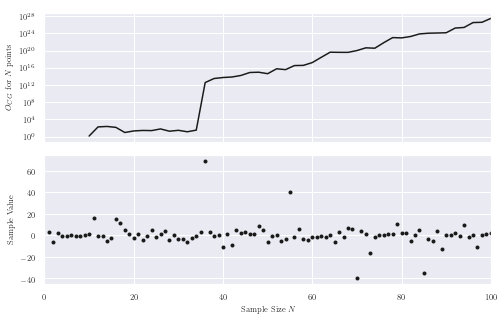

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm
from scipy import integrate

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def logL_cauchy(xi, gamma, mu,
                mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - n * np.log(np.pi)
            + (n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


def logL_gaussian(xi, sigma, mu,
                  mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.57: gaussian likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - 0.5 * n * np.log(2 * np.pi)
            - (n + 1) * np.log(sigma)
            - np.sum(0.5 * ((xi - mu) / sigma) ** 2, 0))


def calculate_odds_ratio(xi, epsrel=1E-8, epsabs=1E-15):
    """
    Compute the odds ratio by perfoming a double integral
    over the likelihood space.
    """
    gauss_Ifunc = lambda mu, sigma: np.exp(logL_gaussian(xi, mu, sigma))
    cauchy_Ifunc = lambda mu, gamma: np.exp(logL_cauchy(xi, mu, gamma))

    I_gauss, err_gauss = integrate.dblquad(gauss_Ifunc, -np.inf, np.inf,
                                           lambda x: 0, lambda x: np.inf,
                                           epsabs=epsabs, epsrel=epsrel)
    I_cauchy, err_cauchy = integrate.dblquad(cauchy_Ifunc, -np.inf, np.inf,
                                             lambda x: 0, lambda x: np.inf,
                                             epsabs=epsabs, epsrel=epsrel)

    if I_gauss == 0:
        O_CG = np.inf
        err_O_CG = np.inf
    else:
        O_CG = I_cauchy / I_gauss
        err_O_CG = O_CG * np.sqrt((err_gauss / I_gauss) ** 2)

    return (I_gauss, err_gauss), (I_cauchy, err_cauchy), (O_CG, err_O_CG)


#------------------------------------------------------------
# Draw points from a Cauchy distribution
np.random.seed(44)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)

#------------------------------------------------------------
# compute the odds ratio for the first 10 points
((I_gauss, err_gauss),
 (I_cauchy, err_cauchy),
 (O_CG, err_O_CG)) = calculate_odds_ratio(xi[:10])

print ("Results for first 10 points:")
print ("  L(M = Cauchy) = %.2e +/- %.2e" % (I_cauchy, err_cauchy))
print ("  L(M = Gauss)  = %.2e +/- %.2e" % (I_gauss, err_gauss))
print ("  O_{CG} = %.3g +/- %.3g" % (O_CG, err_O_CG))

#------------------------------------------------------------
# calculate the results as a function of number of points
Nrange = np.arange(10, 101, 2)
Odds = np.zeros(Nrange.shape)
for i, N in enumerate(Nrange):
    res = calculate_odds_ratio(xi[:N])
    Odds[i] = res[2][0]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.1)

ax1 = fig.add_subplot(211, yscale='log')
ax1.plot(Nrange, Odds, '-k')
ax1.set_ylabel(r'$O_{CG}$ for $N$ points')
ax1.set_xlim(0, 100)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_locator(plt.LogLocator(base=10000.0))

ax2 = fig.add_subplot(212)
ax2.scatter(np.arange(1, len(xi) + 1), xi, lw=0, s=16, c='k')
ax2.set_xlim(0, 100)
ax2.set_xlabel('Sample Size $N$')
ax2.set_ylabel('Sample Value')

plt.show() 


The odds ratio for the first 10 points is very close to unity ($O_{CG} = 1.45$) and 
is therefore inconclusive.
 
Why do we get an inconclusive odds ratio? With only 10 points, the probability of 
drawing at least one point far away from the mean, which would strongly argue against 
the Gaussian model, is fairly small. As the number of data values is increased, the 
ability to discriminate between the models increases, too. As the above figure shows,
when we increase the size of the observed sample, the odds ratio quickly favors the 
Cauchy over the Gaussian model.

## Practical (Computational) Problems

Going back to our polynomial example, we could use the same method and 
integrate (marginalize) the posterior over model parameter space $\theta$.
However, the data likelihood in that example can become cumbersome to track
(for the cubic fit, it's a 4-dimensional space to integrate) and it's much
easier to compare the fits using numerical methods such as Markov Chain
Monte Carlo (MCMC). We shall introduce MCMC next week (and apply it to
this example, too). 

Meanwhile, let's introduce an approximate method for model comparison.

### Approximate Bayesian Model Comparison

We can always increase the number of parameters in our model and improve the fit.  
So we need some kind of "scoring" system that accounts for the complexity of the 
model and penalizes models that are too complex (given the data): this principle
of selecting the simplest model that is in fair agreement with the data is known 
as Occam’s razor. 

Hidden in the above expression for the odds ratio is its ability to penalize complex 
models with many free parameters; that is, Occam’s razor is naturally included into 
the Bayesian model comparison! 

### Bayesian Information Criterion
A common scoring system is the **Bayesian information criterion (BIC)**. It can 
be derived from the model odds ratio by assuming that the data likelihood is 
Gaussian (see \S5.4.2 in textbook for details). The BIC is easier to compute 
than the model odds ratio because it is based on the maximum value of the data 
likelihood, $L_0(M)$, rather than on the integration of the data likelihood over 
the full parameter space (i.e. evidence $E(M)$). For $N$ data points and a model 
with $k$ parameters,
$${\rm BIC} \equiv -2 \ln [L_0(M)] + k \ln N.$$ 
where the 1st term is equal to model's $\chi^2$ (under the assumption of normality;
note that this is not $\chi^2$ per degree of freedom!)
and the 2nd term on the RHS penalizes complex models relative to simple ones.

### Aikake Information Criterion

Another well-known scoring system, which can be derived using information theory 
is the **Aikake information criterion (AIC)**,  computed as
$${\rm AIC} \equiv -2 \ln [L_0(M)] + 2k + \frac{2k(k+1)}{N-k-1}.$$

This comes from information theory considerations -- if you think of modeling as "lossy compression", which model loses less data?

When two models are compared, their BIC (or AIC) are compared analogously to the 
odds ratio, that is, the model with the smaller value wins. If the models are 
equally successful in describing the data (i.e., they have the same value of $L_0(M)$), 
then the model with fewer free parameters wins. 

Both the BIC and AIC are approximations and might not be valid if the underlying 
assumptions are not met. Furthermore, unlike the odds ratio, both of them penalize 
unconstrained parameters. In general, it is better to compute the odds ratio when 
computationally feasible. 

Let's us BIC to choose the best polynomial from the earlier line fitting example. 
Starting with
$${\rm BIC} = \chi^2 + k \ln N,$$ 
with $N=20$ we have:

<pre>
     model     chi2    k   k*ln(N)   BIC       
    linear    11.32    2    5.99    17.31   
  quadratic    9.46    3    8.99    18.45   
     cubic     8.99    4   11.98    20.97  
</pre>

Therefore, the improvement in $\chi^2$ for the quadratic model, relative 
to the linear model, ** is not large enough to justify another free model
parameter.** 

### Cross-validation

Another useful method for model selection is the **cross-validation method**.
Its disadvantage is that it may be computationally intensive for complex
problems, but its great advantage is that it is conceptually simple and
easy to implement (for details see textbook, Section 8.11.1). The basic idea of 
the cross-validation method is not to use a fraction of the sample when
obtaining the best-fit parameters and then compute the goodness-of-fit 
(e.g. $\chi^2$, but any metric can be implemented) with this unused subsample. 
The "leave-one-out" implementation repeats model fitting $N$ times, using
$N-1$ data points. Each time the missing point is used to compute the 
goodness-of-fit, and the $N$ values are averaged. 

When the model is too simple, it will have high bias (under-fitting)
and when the model is too complex, the variance will be high (over-fitting).


![BayesSlide1](figures/fig8-13.jpg)



## Applying Bayesian Principles to Develop Better Histograms

### Knuth's Histograms 

Details are in textbook, $\S$5.7.2.
 
The Scott’s rule and the Freedman–Diaconis rule for estimating optimal bin width produce the same answer for multimodal and unimodal distributions as long as their data set size and scale parameter are the same. 

This undesired result is avoided when using a method developed by Knuth. 



![KnuthSlide](figures/knuth.jpg)



/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/matplotlib/pyplot.py:879: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/matplotlib/pyplot.py:879: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/matplotlib/pyplot.py:879: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/matplotli

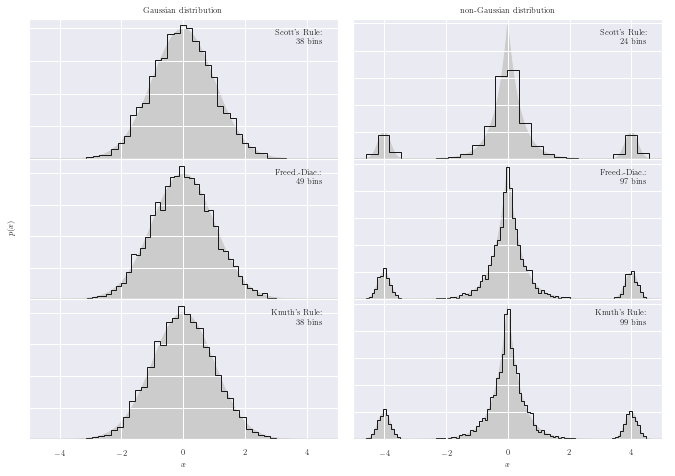

In [14]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import hist

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def plot_labeled_histogram(style, data, name,
                           x, pdf_true, ax=None,
                           hide_x=False,
                           hide_y=False):
    if ax is not None:
        ax = plt.axes(ax)

    counts, bins, patches = hist(data, bins=style, ax=ax,
                                 color='k', histtype='step', density=True)
    ax.text(0.95, 0.93, '%s:\n%i bins' % (name, len(counts)),
            transform=ax.transAxes,
            ha='right', va='top')

    ax.fill(x, pdf_true, '-', color='#CCCCCC', zorder=0)

    if hide_x:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if hide_y:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(-5, 5)

    return ax


#------------------------------------------------------------
# Set up distributions:
Npts = 5000
np.random.seed(0)
x = np.linspace(-6, 6, 1000)

# Gaussian distribution
data_G = stats.norm(0, 1).rvs(Npts)
pdf_G = stats.norm(0, 1).pdf(x)

# Non-Gaussian distribution
distributions = [stats.laplace(0, 0.4),
                 stats.norm(-4.0, 0.2),
                 stats.norm(4.0, 0.2)]

weights = np.array([0.8, 0.1, 0.1])
weights /= weights.sum()

data_NG = np.hstack(d.rvs(int(w * Npts))
                    for (d, w) in zip(distributions, weights))
pdf_NG = sum(w * d.pdf(x)
             for (d, w) in zip(distributions, weights))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0, left=0.07, right=0.95, wspace=0.05, bottom=0.15)
ax = [fig.add_subplot(3, 2, i + 1) for i in range(6)]

# first column: Gaussian distribution
plot_labeled_histogram('scotts', data_G, 'Scott\'s Rule', x, pdf_G,
                       ax=ax[0], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_G, 'Freed.-Diac.', x, pdf_G,
                       ax=ax[2], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_G, 'Knuth\'s Rule', x, pdf_G,
                       ax=ax[4], hide_x=False, hide_y=True)

ax[0].set_title('Gaussian distribution')
ax[2].set_ylabel('$p(x)$')
ax[4].set_xlabel('$x$')

# second column: non-gaussian distribution
plot_labeled_histogram('scotts', data_NG, 'Scott\'s Rule', x, pdf_NG,
                       ax=ax[1], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_NG, 'Freed.-Diac.', x, pdf_NG,
                       ax=ax[3], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_NG, 'Knuth\'s Rule', x, pdf_NG,
                       ax=ax[5], hide_x=False, hide_y=True)

ax[1].set_title('non-Gaussian distribution')
ax[5].set_xlabel('$x$')

plt.show()

### Bayesian Blocks algorithm

Though Knuth’s Bayesian method for choosing histogram bin width is an improvement over 
the Scott’s rule and the Freedman–Diaconis rule, it still has a distinct weakness: 
it assumes a **uniform** width for the optimal histogram bins.  

This limitation can be lifted by maximizing a well-designed likelihood function over 
bins of varying width. This approach has been dubbed Bayesian blocks. The method was 
first developed in the field of time-domain analysis, but is readily applicable to 
histogram data as well. 


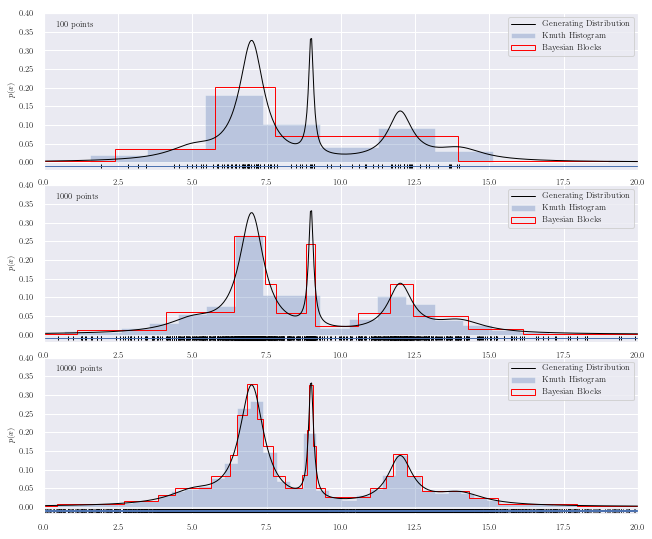

In [15]:
# Generate sample: a mix of several Cauchy distributions
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
N_values = (100, 1000, 10000)
subplots = (311, 312, 313)

for N, subplot in zip(N_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]
    t = np.linspace(-10, 30, 1000)

    # plot the results
    ax.errorbar(xN, -0.01 + 0*xN, xerr=0.0, yerr=0.005, ecolor='black', lw=1)
    ax.plot(t, true_pdf(t), '-', color='black', lw=1,
            label="Generating Distribution")
    hist(xN, bins='knuth', ax=ax, density=True,
         histtype='stepfilled', alpha=0.3,
         label='Knuth Histogram')
    hist(xN, bins='blocks', ax=ax, density=True,
         histtype='step', color='red', alpha=0.99,
         label="Bayesian Blocks")
  
    # label the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
    ax.set_ylabel('$p(x)$')
    ax.legend(loc='upper right', prop=dict(size=8))

    if subplot == 212:
        ax.set_xlabel('$x$')

    ax.set_xlim(0, 20)
    ax.set_ylim(-0.02, 0.4001)

plt.show()


### Bayesian Blocks algorithm

Note that for largest sample (N=10,000), both methods give similar results (e.g. three
components are found in the data). However, for the middle dataset (N=1,000), the
fixed bin width method misses the middle peak - this could be your missed Nobel prize! 